In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [8]:
data_b_O3=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/O3_Data.xlsx",sheet_name='Birmingham')
data_l_O3=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/O3_Data.xlsx",sheet_name='London')
data_lp_O3=pd.read_excel("/Users/roshanchandraayyadevara/Documents/Dataset_Dessertation/year/O3_Data.xlsx",sheet_name='Liverpool')

In [9]:
df_b_O3=data_b_O3[["Year","Site_Name","City","Annual_Mean"]]
df_l_O3=data_l_O3[["Year","Site_Name","City","Annual_Mean"]]
df_lp_O3=data_lp_O3[["Year","Site_Name","City","Annual_Mean"]]

In [10]:
df_b_O3=data_b_O3.groupby('Year').agg(O3_Birmingham=('Annual_Mean', 'mean')).reset_index()
df_l_O3=data_l_O3.groupby('Year').agg(O3_London=('Annual_Mean', 'mean')).reset_index()
df_lp_O3=data_lp_O3.groupby('Year').agg(O3_Liverpool=('Annual_Mean', 'mean')).reset_index()

In [11]:
B_O3=df_b_O3['O3_Birmingham']
l_O3=df_l_O3['O3_London']
lp_O3=df_lp_O3['O3_Liverpool']

In [26]:
df_lp_O3

,Year,O3_Liverpool
0,2000,38.0
1,2001,36.0
2,2002,43.0
3,2003,39.0
4,2004,48.0
5,2005,47.0
6,2006,48.0
7,2007,44.0
8,2008,47.0
9,2009,41.0


In [13]:
print("Maximum of Birmingham",max(B_O3))
print("Maximum of London",max(l_O3))
print("Maximum of Liverpool",max(lp_O3))

Maximum of Birmingham 47.0
Maximum of London 45.0
Maximum of Liverpool 59.0


In [14]:
print("Minimum of Birmingham",min(B_O3))
print("Minimum of London",min(l_O3))
print("Minimum of Liverpool",min(lp_O3))

Minimum of Birmingham 32.5
Minimum of London 30.428571428571427
Minimum of Liverpool 36.0


In [15]:
print("SD of Birmingham",B_O3.std())
print("SD of London",l_O3.std())
print("SD of Liverpool",lp_O3.std())

SD of Birmingham 3.8585696194476946
SD of London 3.780071322785903
SD of Liverpool 5.033092072501423


In [16]:
print("Variance of Birmingham",B_O3.var())
print("Variance of London",l_O3.var())
print("Variance of Liverpool",lp_O3.var())

Variance of Birmingham 14.888559508124727
Variance of London 14.288939205348367
Variance of Liverpool 25.332015810276676


In [17]:
print("Mean of Birmingham",B_O3.mean())
print("Mean of London",l_O3.mean())
print("Mean of Liverpool",lp_O3.mean())

Mean of Birmingham 39.913043478260875
Mean of London 34.947446514837814
Mean of Liverpool 46.17391304347826


In [18]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_O32, l_O32, and lp_O32 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_O3,
    'London': l_O3,
    'Liverpool': lp_O3
})

# Perform one-way AO3VA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='O3 Concentration')['O3 Concentration'],
                                   data.melt(var_name='City', value_name='O3 Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)
else:
    print("There is O3 significant difference among the cities.")


F-statistic: 40.06136768738542
p-value: 4.066892454379641e-12
The means are significantly different among the cities.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Birmingham Liverpool   6.2609    0.0    3.247  9.2747   True
Birmingham    London  -4.9656 0.0006  -7.9794 -1.9517   True
 Liverpool    London -11.2265    0.0 -14.2403 -8.2126   True
------------------------------------------------------------


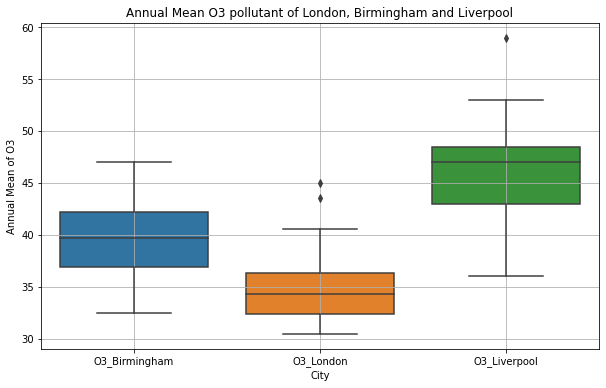

In [19]:
# Combine the data frames
merged_df = df_b_O3.merge(df_l_O3, on='Year').merge(df_lp_O3, on='Year')

# Create a new data frame for Seaborn (melt the data to make it long-form)
melted_df = pd.melt(merged_df, id_vars='Year', var_name='City', value_name='O3_Concentration')

# Plot box plots using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='O3_Concentration', data=melted_df)
plt.title('Annual Mean O3 pollutant of London, Birmingham and Liverpool')
plt.ylabel('Annual Mean of O3')
plt.xlabel('City')
plt.grid(True)
plt.show()


In [28]:
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.multicomp as mc

# Assuming B_NO2, l_NO2, and lp_NO2 are pandas Series containing the data for Birmingham, London, and Liverpool respectively.

# Combine the data into a single DataFrame
data = pd.DataFrame({
    'Birmingham': B_O3,
    'London': l_O3,
    'Liverpool': lp_O3
})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['Birmingham'], data['London'], data['Liverpool'])

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Check for statistical significance (alpha = 0.05)
if p_value < 0.05:
    print("The means are significantly different among the cities.")
    # Perform Tukey's HSD test for post hoc analysis
    mc_result = mc.MultiComparison(data.melt(var_name='City', value_name='NO Concentration')['NO Concentration'],
                                   data.melt(var_name='City', value_name='NO Concentration')['City'])
    tukey_result = mc_result.tukeyhsd()
    print(tukey_result)

    # Get the increasing order of cities based on their NO2 concentrations
    mean_values = data.mean().sort_values(ascending=False)  # Sort in ascending order
    increasing_order = mean_values.index.tolist()
    print("Increasing order of cities based on O3 concentrations:")
    print(increasing_order)

else:
    print("There is no significant difference among the cities.")


F-statistic: 40.06136768738542
p-value: 4.066892454379641e-12
The means are significantly different among the cities.
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Birmingham Liverpool   6.2609    0.0    3.247  9.2747   True
Birmingham    London  -4.9656 0.0006  -7.9794 -1.9517   True
 Liverpool    London -11.2265    0.0 -14.2403 -8.2126   True
------------------------------------------------------------
Increasing order of cities based on O3 concentrations:
['Liverpool', 'Birmingham', 'London']
